$$ \textbf{EE0826 Control Systems} $$

$$ \textbf{Simulation 5} $$

$$ \textbf{Effect of system parameters on Step Response:} $$
$$ \textbf{Damping ratio and maximum overshoot adjustments} $$

$$ \text{Prepared by: Güray Gürkan, PhD} $$

$$ \text{March, 2019} $$

# Maximum Overshoot: Analysis

A stable and realizable system is known to have a pole at $s=-2+j4\pi$.

Then, for the prototype definition:

$$ G(s) = \frac{K}{s^2+bs+c} $$

$ b = -\sum p_i$ and $ c= \|p_i\|^2 =\omega ^2 _N$. So;

$$ G(s) = \frac{K}{s^2+4s+2^2+(4\pi)^2} $$

If the step response converges to 1, then $K=\omega ^2 _N$

Let's generate and plot the step response:

In [4]:
#import numpy and matplotlib functions
%pylab inline 
import control as ctl

Populating the interactive namespace from numpy and matplotlib


In [64]:
alpha = -2
beta = 4*pi
wn = sqrt(alpha**2+beta**2) 
G = ctl.tf(wn**2, [1,-2*alpha,wn**2])
print "G(s) = ",G

G(s) =  
      161.9
-----------------
s^2 + 4 s + 161.9



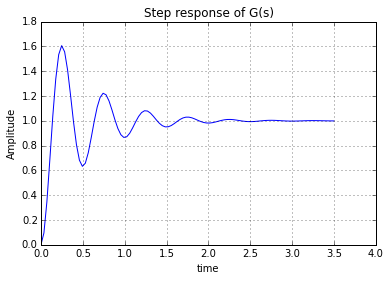

In [65]:
y,t = ctl.step(G)
plot(t,y)
grid()
xlabel('time')
ylabel('Amplitude')
title('Step response of G(s)')

Referring to step response plotting, $y_{SS}=1$ and $y_{max}(t)=1.6$. So the overshoot amplitude is $y_{max}(t)-y_{SS}=1.6-1=0.6$. 

## Calculation of overshoot amplitude and instance
The exact value of overshoot can be calculated by the formula
$$ Overshoot = e^{-\zeta \pi / \sqrt{1-\zeta ^2}}$$
or simply
$$ Overshoot = e^{ -\pi \frac{\alpha}{\beta}}$$


So:

In [83]:
# alpha is alreay negative
overshoot = exp(pi*alpha/beta)
print "Calculated overshoot value:",overshoot

Calculated overshoot value: 0.606530659713


Overshoot instance can be determined by the formula

$$t_{max}= \frac{\pi}{\beta}=\frac{\pi}{\omega_N^2\sqrt{1-\zeta^2}}$$

So
$$ t_{max}=\frac{\pi}{4\pi} = 0.25 $$

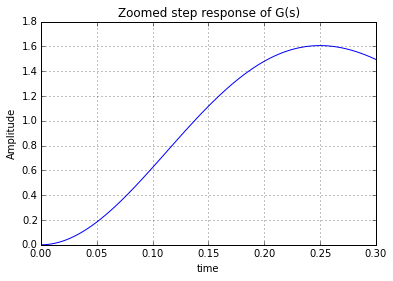

In [28]:
# 0 to 0.3 seconds is enough for observing overshoot
t = linspace(0,0.3,100)
y,t = ctl.step(G,t)
plot(t,y)
grid()
xlabel('time')
ylabel('Amplitude')
title('Zoomed step response of G(s)')

# Generating systems with the same overshoot amplitudes

Let us generate a second system with the same overshoot amplitude but this time occuring at $t = $ 500 ms.
    
- Since the overshoot amplitudes are same, the systems should have the same damping ratio ($\zeta$). So the old system's poles should be moved along a constant angle. 
- The second system has a later $t_{max}$ instance so it should be x2 slower.
- Thus, poles should be moved towards origin.
 
So the new pole locations are:

$$p_{1,2} = \frac{-2 \mp j4\pi}{2}= -1 \mp j2\pi$$
    

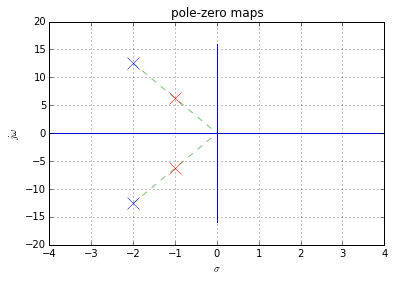

In [79]:
plot((-4,4),(0,0),'b') # x -axis, blue color
plot((0,0),(-16,16),'b') # y-axis, blue color
# Plot damping ratio angles
plot((-2,0),(4*pi,0),'--',alpha=0.5,color='g')
plot((-2,0),(-4*pi,0),'--',alpha=0.5,color='g')

#poles 1
plot([-2,-2],[4*pi,-4*pi],'x',color='b',markersize=12)

#poles 2
plot([-1,-1],[2*pi,-2*pi],'x',color='r',markersize=12)

grid()
xlabel('$ \sigma $')
ylabel('$ j\omega $ ')
title('pole-zero maps');


In [66]:
alpha2 =  alpha/2.
beta2 = beta/2
wn2 = sqrt(alpha2**2+beta2**2) 
G2 = ctl.tf(wn2**2, [1,-2*alpha2,wn2**2])
print "G2(s) = ",G2

G2(s) =  
      40.48
-----------------
s^2 + 2 s + 40.48



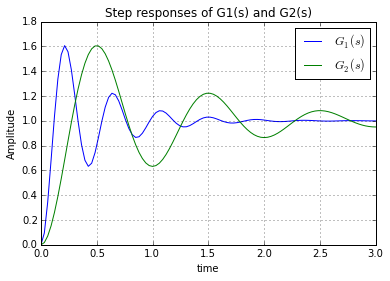

In [74]:
t = linspace(0,3,100)
y2,t = ctl.step(G2,t)
plot(t,y)
plot(t,y2)
grid()
xlabel('time')
ylabel('Amplitude')
title('Step responses of G1(s) and G2(s)')
legend(('$G_1(s)$','$G_2(s)$'));

As the plot reveals, both systems have the same overshoot amplitude but the second system is two times slower.